<a href="https://colab.research.google.com/github/Mehrajbd/Mehrajbd/blob/main/Bank%20Loan%20NNFLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/NNFLL/train.csv')

In [ ]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(0)
dataset['Dependents'] = dataset['Dependents'].fillna(0)
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(0)
dataset['Credit_History'] = dataset['Credit_History'].fillna(0)
dataset['Loan_ID_Num'] = dataset['Loan_ID'].apply(lambda x: int(x[2:]))
dataset['Dependents'] = dataset['Dependents'].replace('3+', '4')

# Convert the 'Dependents' column to float
dataset['Dependents'] = dataset['Dependents'].astype(float)
# drop the original Loan_ID column
dataset = dataset.drop(columns=['Loan_ID'])

In [ ]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID_Num
0,Male,No,0.0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,1002
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2978
610,Male,Yes,4.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2979
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2983
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2984


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Gender', 'Education', 'Self_Employed','Loan_Status','Married']

label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Show the final output
print(dataset.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0             5849   
1       1        1         1.0          0              0             4583   
2       1        1         0.0          0              1             3000   
3       1        1         0.0          1              0             2583   
4       1        0         0.0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         0.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  Loan_Status  Loan_ID_Num  
0         Urban            1         1002  
1         Rural            0

In [ ]:
# Apply one hot encoding on multiple columns
dataset_encoded = pd.get_dummies(dataset, columns=['Property_Area'])

# Concatenate the encoded dataframe with the original dataframe
dataset = pd.concat([dataset, dataset_encoded], axis=1)

dataset.drop(['Property_Area'], axis=1, inplace=True)

# Print the concatenated dataframe
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_Num,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,...,5849,0.0,0.0,360.0,1.0,1,1002,0,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,...,4583,1508.0,128.0,360.0,1.0,0,1003,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,...,3000,0.0,66.0,360.0,1.0,1,1005,0,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,...,2583,2358.0,120.0,360.0,1.0,1,1006,0,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,...,6000,0.0,141.0,360.0,1.0,1,1008,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,...,2900,0.0,71.0,360.0,1.0,1,2978,1,0,0
610,1,1,4.0,0,0,4106,0.0,40.0,180.0,1.0,...,4106,0.0,40.0,180.0,1.0,1,2979,1,0,0
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,...,8072,240.0,253.0,360.0,1.0,1,2983,0,0,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,...,7583,0.0,187.0,360.0,1.0,1,2984,0,0,1


In [ ]:
X = dataset.iloc[:, list(range(10)) + list(range(11, 27))]
y = dataset.iloc[:, 10].values

In [ ]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_Num,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,...,5849,0.0,0.0,360.0,1.0,1,1002,0,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,...,4583,1508.0,128.0,360.0,1.0,0,1003,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,...,3000,0.0,66.0,360.0,1.0,1,1005,0,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,...,2583,2358.0,120.0,360.0,1.0,1,1006,0,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,...,6000,0.0,141.0,360.0,1.0,1,1008,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,...,2900,0.0,71.0,360.0,1.0,1,2978,1,0,0
610,1,1,4.0,0,0,4106,0.0,40.0,180.0,1.0,...,4106,0.0,40.0,180.0,1.0,1,2979,1,0,0
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,...,8072,240.0,253.0,360.0,1.0,1,2983,0,0,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,...,7583,0.0,187.0,360.0,1.0,1,2984,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[0.5 , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.5 , 0.5 , 0.25, ..., 1.  , 0.  , 0.  ],
       [0.5 , 0.5 , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.5 , 0.5 , 0.25, ..., 0.  , 0.  , 1.  ],
       [0.5 , 0.5 , 0.5 , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X_train.shape

(491, 26)

In [ ]:
X_test.shape

(123, 26)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=26, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                540       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5764
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.6904
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.6965
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.6965
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7067
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7434
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8228
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.9084
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.9470
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9878
Epoch 11/

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

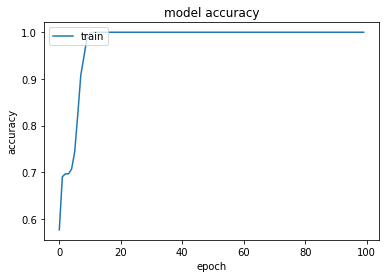

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

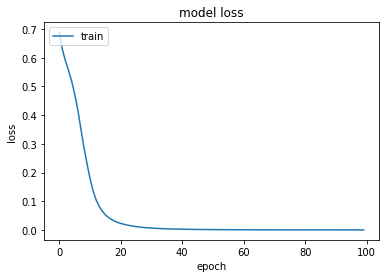

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 1.4332e-04 - accuracy: 1.0000


In [ ]:
history_test

[0.000143317854963243, 1.0]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn)) 

0.983739837398374
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.98      1.00      0.99        80

    accuracy                           0.98       123
   macro avg       0.99      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, pred_knn)
ac = accuracy_score(y_test,pred_knn)

In [ ]:
print(cm)
print(ac)

[[41  2]
 [ 0 80]]
0.983739837398374


In [ ]:
dataset2= pd.read_csv('/content/drive/MyDrive/NNFLL/train.csv')

In [ ]:
dataset2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
dataset2['LoanAmount'] = dataset2['LoanAmount'].fillna(0)
dataset2['Dependents'] = dataset2['Dependents'].fillna(0)
dataset2['Loan_Amount_Term'] = dataset2['Loan_Amount_Term'].fillna(0)
dataset2['Credit_History'] = dataset2['Credit_History'].fillna(0)
dataset2['Loan_ID_Num'] = dataset2['Loan_ID'].apply(lambda x: int(x[2:]))
dataset2['Dependents'] = dataset2['Dependents'].replace('3+', '4')

# Convert the 'Dependents' column to float
dataset2['Dependents'] = dataset2['Dependents'].astype(float)
# drop the original Loan_ID column
dataset2 = dataset2.drop(columns=['Loan_ID'])

In [ ]:
dataset2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID_Num
0,Male,No,0.0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,1002
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2978
610,Male,Yes,4.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2979
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2983
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2984


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Gender', 'Education', 'Self_Employed','Loan_Status','Married']

label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    dataset2[col] = le.fit_transform(dataset2[col])
    label_encoders[col] = le

# Show the final output
print(dataset.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0             5849   
1       1        1         1.0          0              0             4583   
2       1        1         0.0          0              1             3000   
3       1        1         0.0          1              0             2583   
4       1        0         0.0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  ...  \
0                0.0         0.0             360.0             1.0  ...   
1             1508.0       128.0             360.0             1.0  ...   
2                0.0        66.0             360.0             1.0  ...   
3             2358.0       120.0             360.0             1.0  ...   
4                0.0       141.0             360.0             1.0  ...   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5

In [ ]:
# Apply one hot encoding on multiple columns
dataset2_encoded = pd.get_dummies(dataset2, columns=['Property_Area','Loan_Status'])

# Concatenate the encoded dataframe with the original dataframe
dataset2 = pd.concat([dataset2, dataset2_encoded], axis=1)

dataset2.drop(['Property_Area','Loan_Status'], axis=1, inplace=True)

# Print the concatenated dataframe
dataset2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_Num,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_0,Loan_Status_1
0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,...,0.0,0.0,360.0,1.0,1002,0,0,1,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,...,1508.0,128.0,360.0,1.0,1003,1,0,0,1,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,...,0.0,66.0,360.0,1.0,1005,0,0,1,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,...,2358.0,120.0,360.0,1.0,1006,0,0,1,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,...,0.0,141.0,360.0,1.0,1008,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,...,0.0,71.0,360.0,1.0,2978,1,0,0,0,1
610,1,1,4.0,0,0,4106,0.0,40.0,180.0,1.0,...,0.0,40.0,180.0,1.0,2979,1,0,0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,...,240.0,253.0,360.0,1.0,2983,0,0,1,0,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,...,0.0,187.0,360.0,1.0,2984,0,0,1,0,1


In [ ]:
X = dataset.iloc[:,0:25]
y = dataset.iloc[:, [25,26]].values

In [ ]:
y

array([[0, 1],
       [0, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 2.50000000e-01, ...,
        0.00000000e+00, 5.03018109e-04, 1.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 1.50905433e-03, 0.00000000e+00],
       ...,
       [5.00000000e-01, 5.00000000e-01, 2.50000000e-01, ...,
        1.00000000e+00, 9.96478873e-01, 0.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, ...,
        1.00000000e+00, 9.96981891e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X_train.shape

(491, 25)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(30, input_dim=25, activation='relu'))
model2.add(Dense(2, activation='softmax'))
# compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 30)                780       
                                                                 
 dense_18 (Dense)            (None, 2)                 62        
                                                                 
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.3849
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.4542
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.4969
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.6069
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.6212
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.6171
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.6191
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.6069
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.6069
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.5988
Epoch 11/

In [ ]:
acc = history2.history['accuracy']
loss = history2.history['loss']

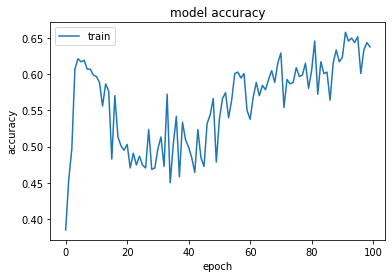

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

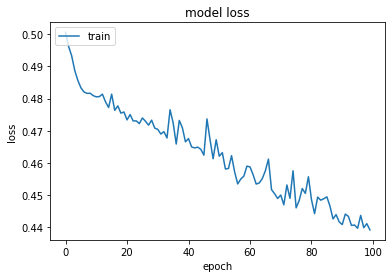

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history2.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test2= model2.evaluate(X_test,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.5122


In [ ]:
history_test2

[0.5775374174118042, 0.5121951103210449]

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn)) 

0.6178861788617886
              precision    recall  f1-score   support

           0       0.45      0.57      0.51        42
           1       0.44      0.33      0.37        43

   micro avg       0.45      0.45      0.45        85
   macro avg       0.45      0.45      0.44        85
weighted avg       0.45      0.45      0.44        85
 samples avg       0.31      0.31      0.31        85



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

cm = multilabel_confusion_matrix(y_test, pred_knn)
ac = accuracy_score(y_test,pred_knn)

In [ ]:
print(cm)
print(ac)

[[[52 29]
  [18 24]]

 [[62 18]
  [29 14]]]
0.6178861788617886
